In [1]:
##Importing the necessary libraries: Pandas, Numpy, Matplotlib and Seaborn.

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##Importing a csv file with the workable data do Python.

clean_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
clean_df
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [3]:
## Using the np.number and object methods to segregate the numerical data types and categorical data types respectively.

numerical_df = clean_df.select_dtypes(include=np.number)
categorical_df = clean_df.select_dtypes(include=object)

categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


Text(0.5, 1.0, 'Customer Heatmap')

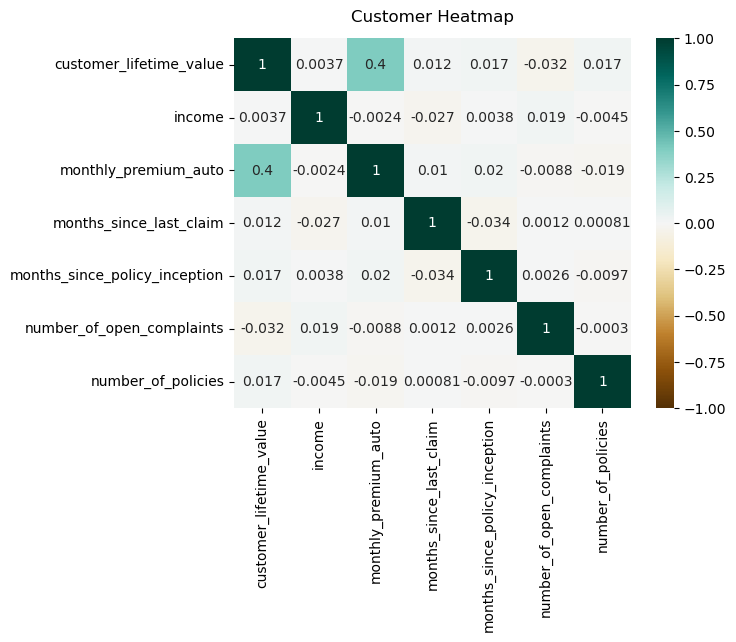

In [4]:
# Activity: check if there are highly correlated features and drop them if there are any.

numerical_df2 = numerical_df.drop(columns = 'total_claim_amount') ## droping our target feature

heatmap = sns.heatmap(numerical_df2.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Customer Heatmap', fontdict={'fontsize':12}, pad=12)

## Since there aren't highly correlated features, we don't have to drop anything else.

In [5]:
# Activity: One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

## Separating nominal and ordinal variables:

nominal_df = categorical_df[["region", "response", "employment_status", "gender", "location_code", "marital_status", "policy_type", "policy", "sales_channel", "vehicle_class"]]
ordinal_df = categorical_df[["coverage", "education", "month", "renew_offer_type", "vehicle_size"]]

## Dummifying the nominal columns:

nominal_df = pd.get_dummies(nominal_df, drop_first = True)
nominal_df

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
10685,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
## Ordinal encoding the ordinal columns:

ordinal_df["coverage"] = ordinal_df["coverage"].replace({"basic": 0, "extended": 1, "premium": 2})
ordinal_df["education"] = ordinal_df["education"].replace("bachelor", "college")
ordinal_df["education"] = ordinal_df["education"].replace({"high school or below": 0, "college": 1, "master": 2, "doctor": 3})
ordinal_df["month"] = ordinal_df["month"].replace({"jan": 1, "feb": 2})
ordinal_df["renew_offer_type"] = ordinal_df["renew_offer_type"].replace({"offer1": 1, "offer2": 2, "offer3": 3, "offer4": 4})
ordinal_df["vehicle_size"] = ordinal_df["vehicle_size"].replace({"small": 0, "medsize": 1, "large": 2})
ordinal_df

,coverage,education,month,renew_offer_type,vehicle_size
0,0,1,2,3,1
1,0,1,1,4,1
2,0,1,2,3,1
3,1,1,1,2,1
4,2,1,1,1,1
...,...,...,...,...,...
10684,2,1,1,3,1
10685,0,1,1,2,1
10686,1,1,2,1,1
10687,2,1,2,1,1


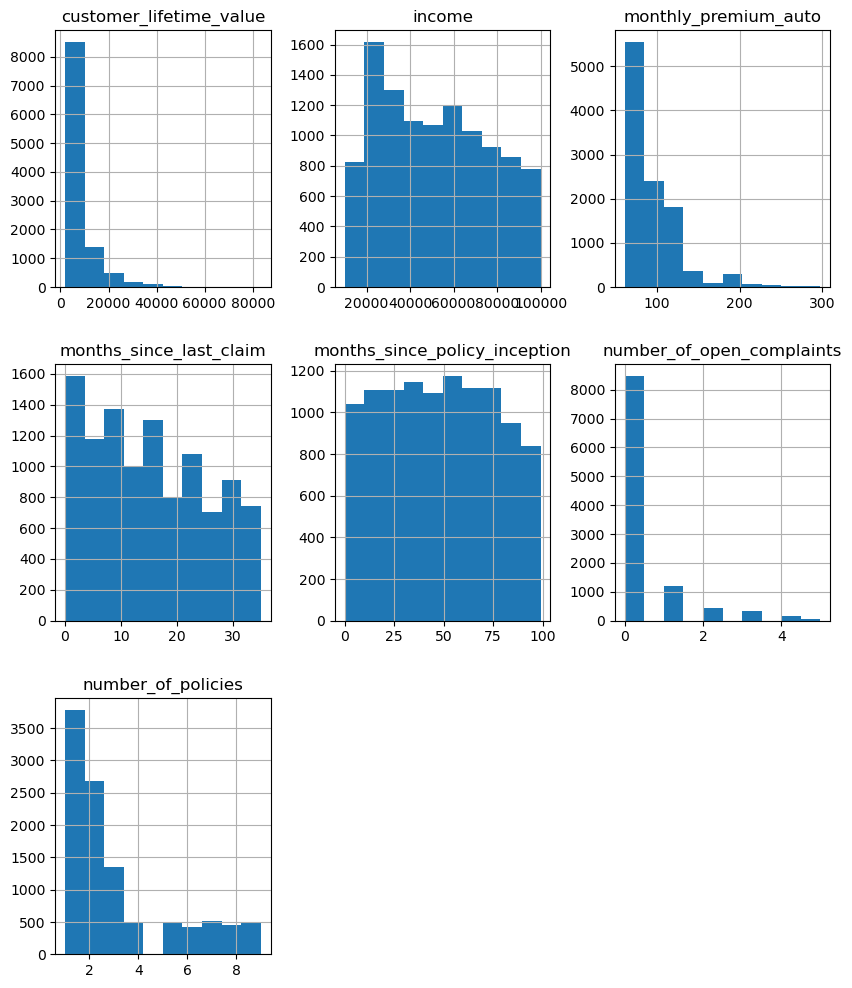

In [7]:
# Optional Task: Begin by visually examining distributions (histograms) of the numerical features.
# Select a variable, call it varA, which takes on a wide range of numerical values, and another,
# varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.

numerical_df2.hist(figsize=(10,12))

varA = numerical_df2["income"]
varB = numerical_df2["customer_lifetime_value"]

In [8]:
# 1. varA - Use minmax transform to bring varA's values into the range [0,1].
# Check that varA has been rescaled using a distplot or a histagram

from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

Text(0.5, 1.0, 'Income_min-max_scale')

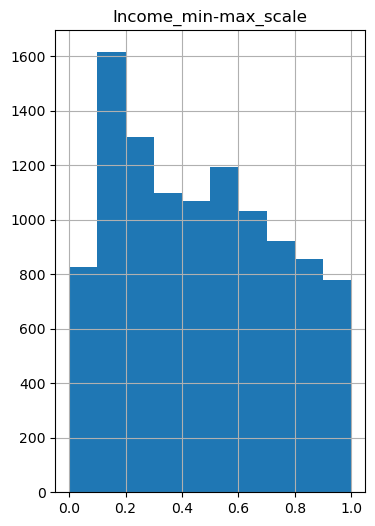

In [14]:
varA = minmax_scale(varA, feature_range=(0, 1), axis=0, copy=True)

varA = pd.DataFrame(varA)
varA.hist(figsize=(4,6))
plt.title("Income_min-max_scale")


<AxesSubplot:>

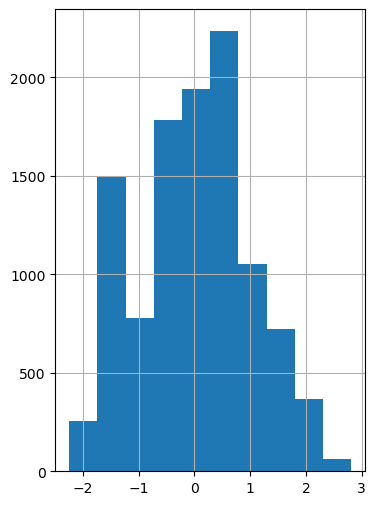

In [27]:
# 2. varB - Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
# Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.


pt = PowerTransformer(method = 'yeo-johnson')
numerical_df2["customer_lifetime_value_trans"] = pt.fit_transform(np.array(numerical_df2["customer_lifetime_value"]).reshape(-1,1))[:,0]
numerical_df2["customer_lifetime_value_trans"].hist(figsize=(4,6))